### Video Link : https://drive.google.com/file/d/1FZjLvaGwDSJZTLzdMbz_3UGIzZVyXtG8/view?usp=sharing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
nltk.download('stopwords')
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Reading Data

In [5]:
df = pd.read_excel("/content/drive/MyDrive/Imdb.xlsx")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### EDA AND FEATURE ENGINEERING

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  50000 non-null  int64 
 1   tokens     50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49581,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<Axes: xlabel='sentiment', ylabel='count'>

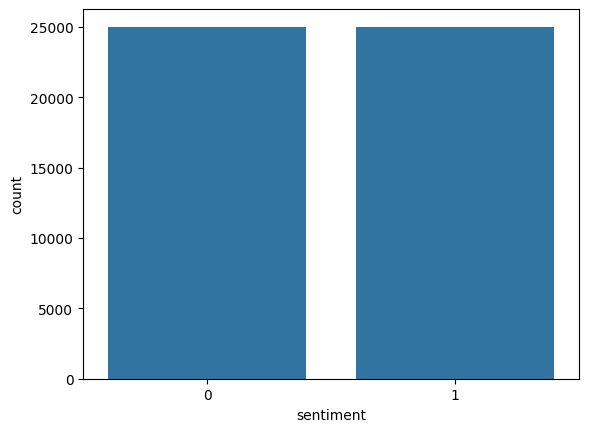

In [50]:
sns.countplot(data=df,x='sentiment')

### HTML Tags Removal

In [8]:
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

### Special character removal

In [9]:
def remove_special_chars(text):
    text = text.lower()
    return re.sub(r'[^a-zA-Z#]', ' ', text)

df['clean_review'] = np.vectorize(remove_html_tags)(df['review'])
df['clean_review'] = df['clean_review'].apply(remove_special_chars)

### Wordcloud

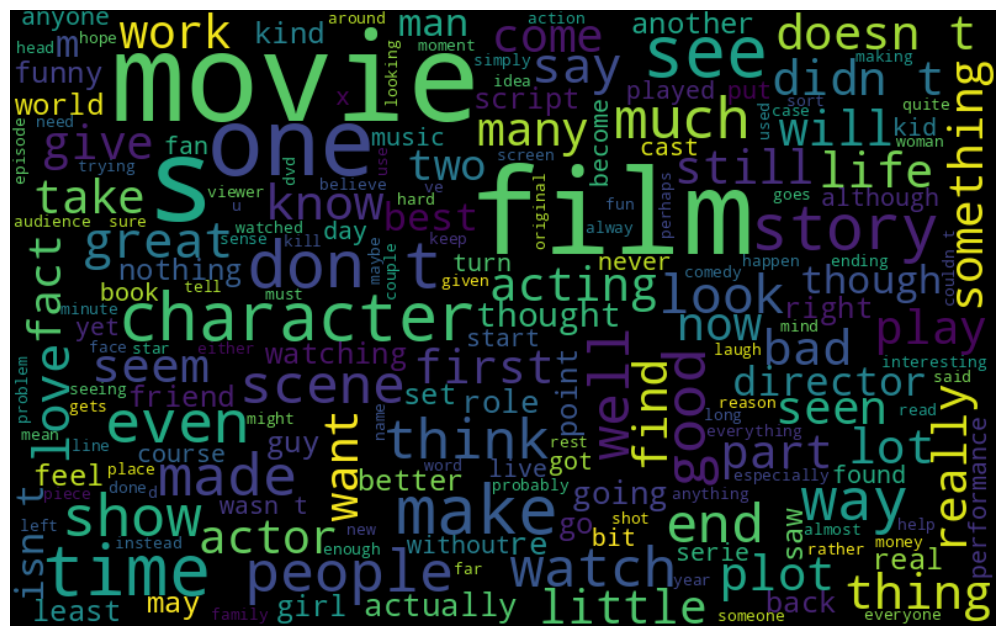

In [10]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_review']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is...


### Stopwords removal

In [12]:
stop_words = stopwords.words('english')
df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

### Tokenization

In [13]:
allsent = []
for sentence in df['clean_review']:
    sent = sentence.split()
    allsent.append(sent)

In [14]:
tokens = pd.DataFrame({'tokens': allsent})
df = pd.concat((df,tokens),axis=1)
df.head()

,review,sentiment,clean_review,tokens
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...,"[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,"[petter, mattei, love, time, money, visually, ..."


In [15]:
df.isna().sum()

,0
review,0
sentiment,0
clean_review,0
tokens,0


### Stemming

In [16]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda sentence: [stemmer.stem(word) for word in sentence])
df.head()

,review,sentiment,clean_review,tokens
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...,"[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,"[petter, mattei, love, time, money, visual, st..."


In [17]:
df['tokens'] = df['tokens'].apply(lambda x: " ".join(x))
df.head()

,review,sentiment,clean_review,tokens
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,petter mattei love time money visual stun film...


In [18]:
df.drop(['clean_review','review'],axis=1,inplace=True)

### Label Encoding Sentiment

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [20]:
df.head()

,sentiment,tokens
0,1,one review mention watch oz episod hook right ...
1,1,wonder littl product film techniqu unassum old...
2,1,thought wonder way spend time hot summer weeke...
3,0,basic famili littl boy jake think zombi closet...
4,1,petter mattei love time money visual stun film...


### Data Splitting

In [21]:
from sklearn.model_selection import train_test_split as tts

In [22]:
X = df['tokens']
y = df['sentiment']

In [23]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=42)

### Vectorization

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

In [27]:
X_train_tfidf = X_train_tfidf.reshape((X_train_tfidf.shape[0], 1, X_train_tfidf.shape[1]))
X_test_tfidf = X_test_tfidf.reshape((X_test_tfidf.shape[0], 1, X_test_tfidf.shape[1]))

### MODEL 1 : LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Reshape
from tensorflow.keras.optimizers import Adam

In [29]:
# Define the LSTM Model
model = Sequential([
    Input(shape=(1, X_train_tfidf.shape[2])),  # Correct input shape
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),  # Regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

In [30]:
# Compile the Model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [31]:
# Train the Model
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7876 - loss: 0.4169 - val_accuracy: 0.8851 - val_loss: 0.2732
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9120 - loss: 0.2250 - val_accuracy: 0.8812 - val_loss: 0.2926
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9222 - loss: 0.1893 - val_accuracy: 0.8799 - val_loss: 0.3074
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9278 - loss: 0.1579 - val_accuracy: 0.8751 - val_loss: 0.3537
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9305 - loss: 0.1431 - val_accuracy: 0.8713 - val_loss: 0.4170
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9362 - loss: 0.1199 - val_accuracy: 0.8659 - val_loss: 0.4808
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9413 - loss: 0.1100 - val_accuracy: 0.8629 - val_loss: 0.5265
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9459 - los

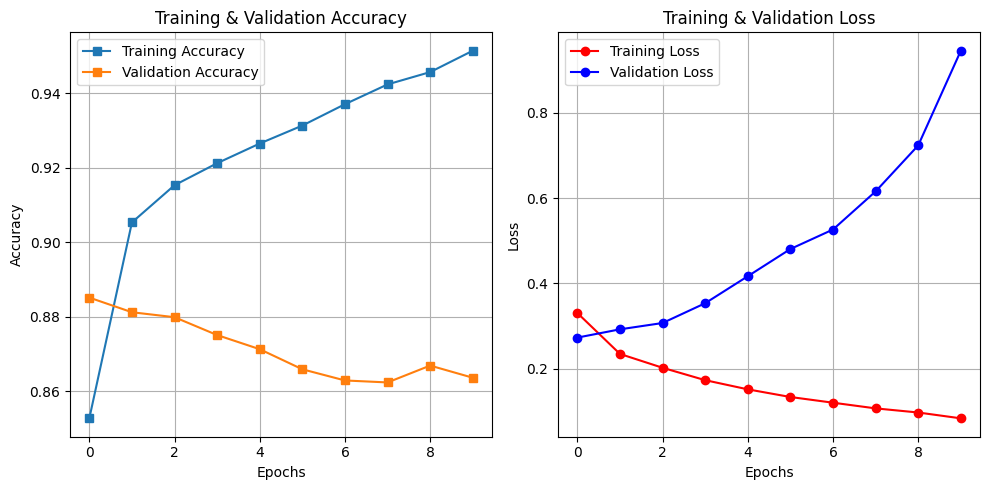

In [35]:
history_dict = history.history

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy', marker='s')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss', marker='o', color='red')
plt.plot(history_dict['val_loss'], label='Validation Loss', marker='o', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [36]:
predictions = model.predict(X_test_tfidf)
predictions = (predictions > 0.5).astype(int)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
predictions

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

#### Conclusion for Model 1 :
LSTM model is having very high validation loss but training loss is very low OR training accuracy is very high as compared to validation here model is **OVERFITTED**

### MODEL 2 Logistic Regression

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()
model = lr.fit(X_train_vector,y_train)
y_pred = model.predict(X_test_vector)

In [45]:
from sklearn.metrics import *
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f'Precision : {precision_score(y_test,y_pred)}')
print(f'recall : {recall_score(y_test,y_pred)}')

0.8867333333333334
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7411
           1       0.88      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

[[6485  926]
 [ 773 6816]]
Precision : 0.8803926633944718
recall : 0.8981420477006193


### Conclusion : Logistic regression is giving a good accuracy of 88%. Hence using it.

### Prediction function

In [56]:
def text_preprocessing_and_prediction(text):
    text_transformed = []
    for word in text.split():
        stem = stemmer.stem(word)
        text_transformed.append(stem)
    text_transformed = " ".join(text_transformed)
    filtered_text = [word for word in text_transformed.split() if word.lower() not in stop_words]
    text_transformed = " ".join(filtered_text)
    print(text_transformed)
    test_input = vectorizer.transform([text_transformed])
    result = model.predict(test_input)[0]
    if result == 1:
      return "positive"
    else:
      return "negative"

In [ ]:
text ="Movie is not good"

In [64]:
print(text_preprocessing_and_prediction(text))

product product, veri bad
negative
